Dataset Overview:
  product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0              

C:\Users\sushm\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


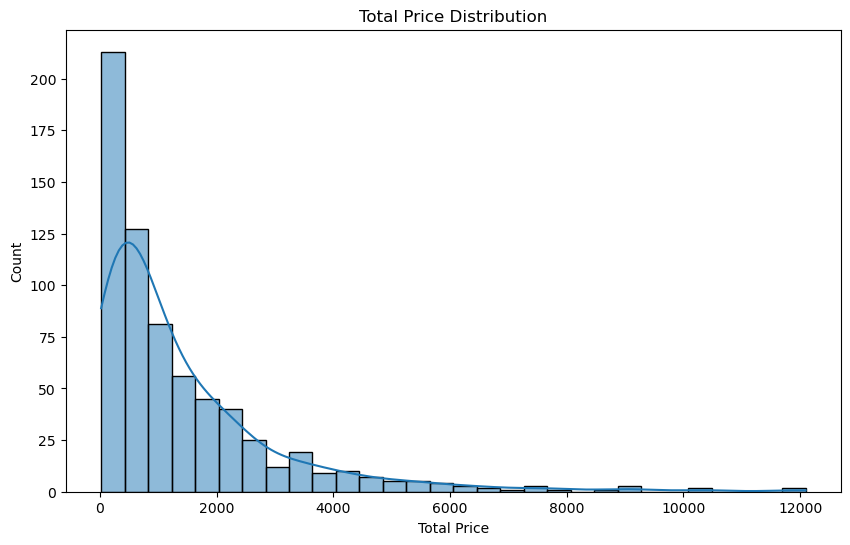

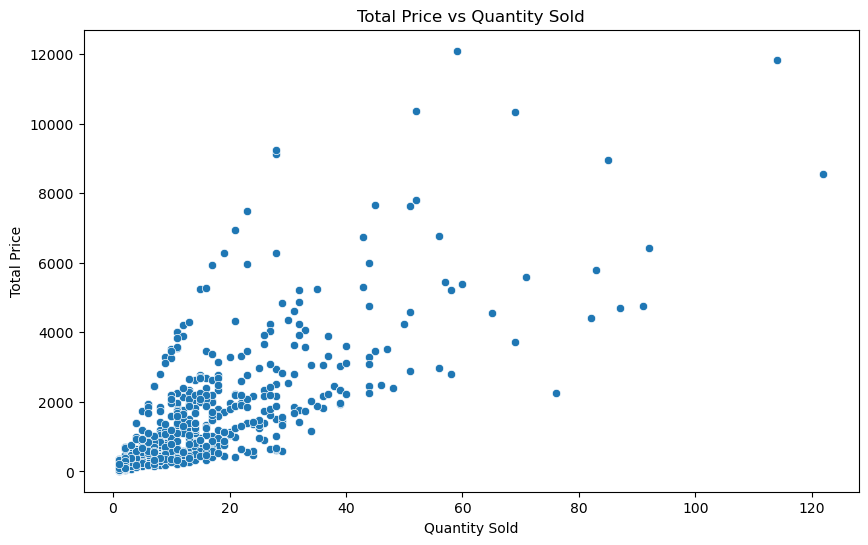

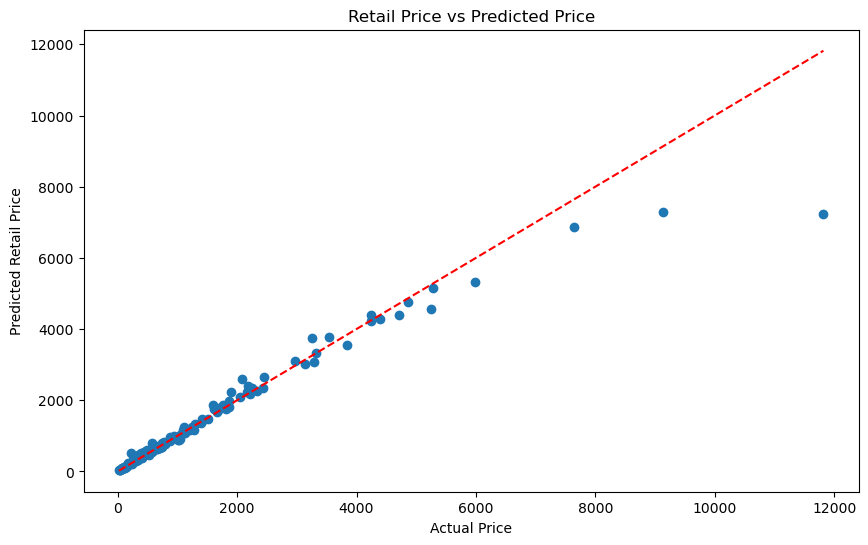

Mean Squared Error: 202548.15894627763
R^2 Score: 0.9358806245308553
Accuracy Percentage: 93.59%


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('retail_price.csv')

# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())

# Display all column names in the dataset
print("Columns in the dataset:")
print(data.columns)

# 1. Total Price Distribution Graph
plt.figure(figsize=(10, 6))
sns.histplot(data['total_price'], bins=30, kde=True)
plt.title('Total Price Distribution')
plt.xlabel('Total Price')
plt.ylabel('Count')
plt.show()

# 2. Relationship between Quantity of Products Sold and Total Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='qty', y='total_price', data=data)  # Ensure column name is 'qty'
plt.title('Total Price vs Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Price')
plt.show()

# 3. Prepare data for Random Forest
# Ensure 'total_price' and 'actual_price' columns exist
if 'total_price' not in data.columns:
    raise ValueError("Total price column not found in the dataset!")
    
if 'qty' not in data.columns:
    raise ValueError("Quantity column not found in the dataset!")

if 'actual_price' in data.columns:
    X = data.drop(['total_price', 'actual_price'], axis=1)  # Features
else:
    print("Warning: 'actual_price' column not found in the dataset. Proceeding without dropping it.")
    X = data.drop(['total_price'], axis=1)  # Features

y = data['total_price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through all columns in X_train and encode object (string) columns
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])  # Apply the same encoding to X_test

# 4. Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Retail Price vs Actual Price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect prediction
plt.title('Retail Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Retail Price')
plt.show()

# 7. Calculate accuracy percentage
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_percentage = r2 * 100

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Accuracy Percentage: {accuracy_percentage:.2f}%')
